## Read the submit file

In [1]:
import gzip
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

base_dir = 'D:/DeepLearn/output'
file_path = os.path.join(base_dir, 'submit_2019-05-23_03h40.csv.gz')
flabel = file_path.split('.')[0].split('\\')[-1]

with gzip.open(file_path) as f:
    features_train = pd.read_csv(f)

features_example = features_train['rle_mask'][0]

def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)


# Show an example
mask = rle_decode(features_example, [64,64])
plt.imshow(mask,'gray')
plt.show()

# Decoding all
shape = [64, 64]
#out_dir = os.path.join(base_dir, 'PredLabel_' + flabel)
out_dir = os.path.join(base_dir, 'PredLabel')
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
    
for i in range(len(features_train)):
    rle_mask = features_train['rle_mask'][i]
    mask = np.zeros(shape)
    
    if not pd.isnull(rle_mask):
        mask = rle_decode(rle_mask, shape)
    
    out_file = os.path.join(out_dir, features_train['img'][i])
    img = Image.fromarray(mask, 'L')
    img.save(out_file)


<Figure size 640x480 with 1 Axes>

ValueError: operands could not be broadcast together with shapes (133,) (132,) 

In [5]:
file_path.split('.')[0].split('\\')

['D:/DeepLearn/output', 'submit_2019-02-06_03h20']

In [2]:
features_train

img                                           rle_mask
0   102.tif  74 1 76 1 79 1 138 4 143 1 202 5 208 1 262 2 2...
1   104.tif  268 1 391 5 455 5 518 5 579 11 644 10 708 6 71...
2   105.tif  121 2 1246 2 1308 6 1371 8 1434 13 1498 14 155...
3   110.tif  188 2 252 2 378 1 503 1 1119 2 1154 1 1182 3 1...
4   137.tif  65 2 68 1 70 5 129 2 132 1 134 6 194 9 257 9 3...
5    14.tif  451 2 515 2 542 1 544 2 578 2 601 13 641 3 662...
6   145.tif  173 2 237 2 493 2 557 3 621 3 1124 2 1129 11 1...
7    15.tif  66 1 69 5 129 8 139 1 193 8 257 7 313 1 321 5 ...
8   151.tif  121 2 201 1 388 1 390 2 453 4 507 1 514 2 517 ...
9   158.tif  2 15 44 1 65 17 106 5 129 16 193 15 257 12 315...
10  159.tif  5 3 10 1 66 13 130 12 193 13 257 13 321 12 385...
11  160.tif  12 1 15 1 66 1 72 9 115 1 119 1 122 1 130 2 13...
12  176.tif  5 5 66 8 130 7 184 1 186 2 194 6 247 2 251 3 2...
13  182.tif  30 1 81 1 83 2 90 10 141 5 147 2 156 12 205 6 ...
14  193.tif  77 1 83 1 138 1 141 2 201 2 269 1 321 2 385 4 ...
15  194.tif  3 2 66 3 70 1 130 2 134 1 194 2 258 4 322 4 38...
16  202.tif  765 1 827 1 829 2 891 1 893 2 958 1 1053 4 111...
17  204.tif  2 4 65 5 129 5 193 4 257 4 262 1 321 3 385 3 4...
18  205.tif  178 1 194 1 258 2 442 1 505 3 570 2 891 1 954 ...
19  207.tif  711 1 772 6 835 2 838 4 844 1 898 5 905 1 962 ...
20  212.tif  50 2 54 1 56 2 113 4 118 5 124 5 176 5 182 11 ...
21  213.tif  62 1 119 9 183 9 247 9 311 10 375 10 441 8 504...
22  216.tif  254 1 386 1 450 2 706 1 770 1 988 1 1026 1 105...
23  236.tif  203 2 266 4 322 1 330 3 395 2 460 1 579 1 643 ...
24  247.tif  2 5 65 7 75 2 105 1 129 5 138 1 157 1 166 2 19...
25   25.tif  9 4 14 1 22 5 53 12 69 8 78 2 81 3 85 7 99 2 1...
26  252.tif  117 2 182 2 246 3 311 2 442 1 506 1 540 1 599 ...
27  256.tif  129 4 140 5 193 6 204 6 257 7 321 8 331 2 385 ...
28  257.tif  197 3 258 5 321 6 329 1 385 10 449 10 513 10 5...
29  272.tif  57 3 121 3 157 1 185 3 220 2 249 3 282 4 346 4...
..      ...                                                ...
66  466.tif  329 1 391 1 393 2 455 4 514 3 518 4 544 1 578 ...
67   47.tif  172 6 236 8 246 1 300 11 365 10 376 1 430 8 44...
68  472.tif  69 2 133 2 195 2 258 3 800 1 863 2 871 4 925 4...
69  476.tif  2 3 65 6 77 1 129 5 193 3 258 1 482 2 486 3 54...
70  477.tif  72 2 354 3 361 1 376 1 414 1 416 11 475 16 492...
71   48.tif  168 5 188 1 234 10 247 1 252 1 300 10 365 10 3...
72  481.tif  136 3 200 4 264 4 328 5 344 1 357 2 361 1 392 ...
73  491.tif  898 2 962 3 977 2 1026 3 1040 4 1091 1 1103 2 ...
74  495.tif  258 1 322 2 386 2 391 2 451 2 515 2 578 3 642 ...
75  496.tif  133 2 322 2 386 2 450 1 857 1 916 3 921 2 976 ...
76  510.tif  2 5 9 1 62 1 65 12 123 5 129 10 186 13 250 6 2...
77  511.tif  11 1 16 1 59 1 61 3 66 2 70 12 122 10 134 10 1...
78  514.tif  133 1 187 2 194 4 251 4 258 2 317 2 351 1 382 ...
79  517.tif  121 1 475 1 483 4 535 1 537 3 542 2 546 5 597 ...
80  519.tif  52 3 116 4 181 5 246 5 310 6 376 4 440 5 505 4...
81  525.tif  66 1 68 1 70 6 78 3 130 5 136 9 193 15 211 1 2...
82  527.tif  2 9 13 1 15 2 65 19 85 1 88 5 129 18 150 2 154...
83  532.tif  604 4 665 11 727 13 790 15 853 17 917 19 980 2...
84  551.tif  3 2 38 2 66 4 102 8 130 3 135 1 169 7 193 2 23...
85   61.tif  2 2 65 11 129 13 193 12 257 7 321 6 385 6 449 ...
86   64.tif  333 1 582 3 646 2 705 1 708 1 716 1 769 4 780 ...
87   68.tif  125 3 189 3 928 2 931 1 985 12 1048 13 1111 14...
88   73.tif  5 1 7 3 66 1 68 12 130 13 190 1 194 13 258 12 ...
89   79.tif  112 1 175 5 188 1 240 7 248 1 306 10 370 4 375...
90   87.tif  744 1 750 1 807 2 813 4 871 1 874 8 937 9 1000...
91   89.tif  7 1 68 4 73 3 131 7 194 3 198 4 258 1 261 1 26...
92    9.tif  2 4 65 5 71 2 129 5 193 5 257 5 321 4 385 3 44...
93   93.tif  4 19 66 22 130 23 193 25 257 24 321 21 385 20 ...
94   95.tif  66 13 130 7 138 5 193 8 202 5 259 3 266 1 269 ...
95   97.tif  604 2 669 1 672 1 727 2 730 2 733 8 790 19 853...

[96 rows x 2 columns]

In [4]:
import os
import numpy as np
from PIL import Image

shape = [64, 64]
composite_path = 'D:/Data/CNNTrainingCrop64_Added/CompositeLabelTotal'
out_dir = 'D:/DeepLearn/output'

def extract_myocardium(composite_path, fname, shape):
    composite_file = os.path.join(composite_path, fname)
    composite = Image.open(composite_file)
    test_composite = np.array(composite)
    #plt.imshow(test_composite)
    #plt.show()
    test_myo = np.zeros(shape)
    values = np.unique(test_composite)
    if np.max(values) == 4:
        test_myo[test_composite == 2] = 1
        test_myo[test_composite == 4] = 1
    else:
        test_myo[test_composite == 2] = 1
    
    #plt.imshow(test_myo)
    #plt.show()
    return test_myo
    
def overlay_infarct(test_myo, fname, shape, out_dir):
    # Show an example
    img_file = os.path.join('D:/Data/CNNTrainingCrop64_Added/TrainingDataTotal', fname)
    img = np.array(Image.open(img_file))
    features_example = features_train['rle_mask'][num]
    mask = np.zeros(shape)
    if not pd.isnull(features_example):
        mask = rle_decode(features_example, shape)
        
    in_dir = os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingLabel'))
    test_mask = Image.open(os.path.join(in_dir, fname))
    test_mask = np.array(test_mask)
    test_mask[test_mask <= 1.5] = 0;
    test_mask[test_mask > 1.5] = 1;

    overlay = test_mask + test_myo + mask*3
    test_mask = test_mask*2 + test_myo
    mask = mask*2 + test_myo
    
    test_masked = np.ma.masked_where(test_mask == 0, test_mask)
    masked = np.ma.masked_where(mask == 0, mask)
    overlaid = np.ma.masked_where(overlay == 0, overlay)
    
    plt.figure()
    print('Predicted')
    plt.imshow(img,'gray',interpolation='none')
    plt.imshow(masked, vmin=1, vmax=3, cmap='jet',interpolation='none', alpha=0.4)
    #plt.show()
    out_file = os.path.join(out_dir, 'pred_'+fname)
    plt.savefig(out_file)

    plt.figure()
    print('Truth')
    plt.imshow(img,'gray',interpolation='none')
    plt.imshow(test_masked, vmin=1, vmax=3, cmap='jet',interpolation='none', alpha=0.4)
    #plt.show()
    out_file = os.path.join(out_dir, 'trut_'+fname)
    plt.savefig(out_file)
    
    plt.figure()
    print('Overlaid')
    plt.imshow(img,'gray',interpolation='none')
    plt.imshow(overlaid, vmin=1, vmax=5, cmap='jet',interpolation='none', alpha=0.4)
    #plt.show()
    out_file = os.path.join(out_dir, 'overlay_'+fname)
    plt.savefig(out_file)

## Show Examples 120.tif

110.tif
Predicted


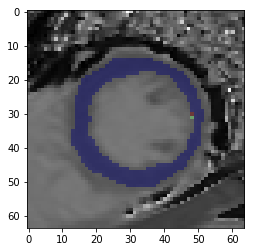

Truth


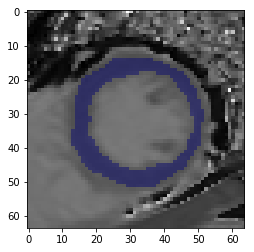

In [20]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

num = 4
fname = features_train['img'][num]
print(fname)

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

## Show Examples 23.tif

17.tif
Predicted


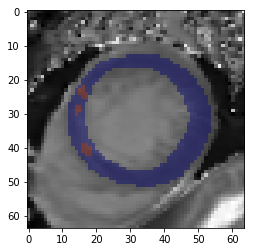

Truth


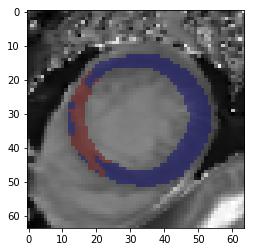

In [19]:
num = 14
fname = features_train['img'][num]
print(fname)

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

## Show Examples 24.tif

176.tif
Predicted


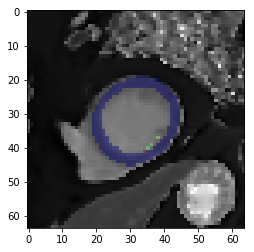

Truth


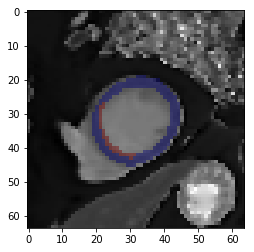

In [18]:
num = 15
fname = features_train['img'][num]
print(fname)

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

## Example of 1.tif

92.tif
Predicted


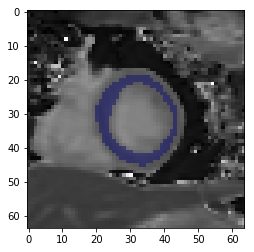

Truth


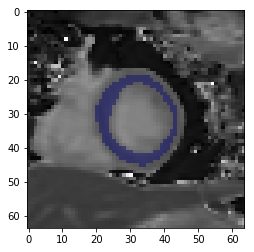

In [29]:
num = 108
fname = features_train['img'][num]
print(fname)

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

In [5]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from glob import glob

def dice(im1, im2):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)
    smooth = 1.
    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return (2. * intersection.sum() + smooth) / (im1.sum() + im2.sum() + smooth)

base_dir = 'D:/DeepLearn/output'
out_dir = os.path.join(base_dir, 'PredLabel')
in_dir = os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingLabel'))
pred_glob = glob(os.path.join(out_dir, '*'))
test_glob = glob(os.path.join(in_dir, '*'))
mask_glob = glob(os.path.join(os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingMask')), '*'))
apply_mask = True
im_mask = np.ones((64,64))

probs = list()
for i in range(len(pred_glob)):
    im_pred = Image.open(pred_glob[i])
    im_test = Image.open(test_glob[i])
    
    im_pred = np.array(im_pred) # The im_pred here is binary image
    im_test = np.array(im_test)
    im_test[im_test <= 1.5] = 0;
    im_test[im_test > 1.5] = 1;
    
    if apply_mask:
        im_mask = np.array(Image.open(mask_glob[i]))
    
    dice_coef = dice(im_pred*im_mask, im_test)
    if not pd.isnull(dice_coef):
        probs.append(dice_coef)
    else:
        probs.append(1)

print(sorted(probs))
nonz = list(np.nonzero(probs))[0]

nonz_probs = list()
for i in nonz:
    nonz_probs.append(probs[i])
print(np.mean(probs))
print(np.mean(nonz_probs))
print(np.median(nonz_probs))

[0.007246376811594203, 0.00909090909090909, 0.010416666666666666, 0.010526315789473684, 0.011764705882352941, 0.014084507042253521, 0.017543859649122806, 0.018518518518518517, 0.021739130434782608, 0.022222222222222223, 0.022727272727272728, 0.02702702702702703, 0.02702702702702703, 0.03260869565217391, 0.034482758620689655, 0.03529411764705882, 0.03571428571428571, 0.04065040650406504, 0.041666666666666664, 0.045454545454545456, 0.047619047619047616, 0.047619047619047616, 0.058823529411764705, 0.058823529411764705, 0.0625, 0.06666666666666667, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.07954545454545454, 0.08333333333333333, 0.09090909090909091, 0.10091743119266056, 0.10204081632653061, 0.10714285714285714, 0.1111111111111111, 0.1111111111111111, 0.11475409836065574, 0.11858974358974358, 0.11956521739130435, 0.13428571428571429, 0.15454545454545454, 0.15555555555555556, 0.15671641791044777, 0.16666666666666666, 0.16666666666666666, 0.1875, 0.19101123595505617, 0.

In [25]:
features_train['img']

0        1.tif
1       10.tif
2      104.tif
3      105.tif
4      110.tif
5      126.tif
6      131.tif
7      144.tif
8      151.tif
9      152.tif
10     159.tif
11     163.tif
12     166.tif
13     167.tif
14      17.tif
15     176.tif
16     182.tif
17     183.tif
18     199.tif
19     204.tif
20     205.tif
21     207.tif
22     213.tif
23      22.tif
24     224.tif
25     226.tif
26     229.tif
27     232.tif
28     234.tif
29     236.tif
        ...   
80     410.tif
81      42.tif
82     420.tif
83     428.tif
84     430.tif
85     431.tif
86      44.tif
87      45.tif
88     451.tif
89     457.tif
90     459.tif
91     462.tif
92     469.tif
93     490.tif
94     509.tif
95     511.tif
96     521.tif
97     523.tif
98     527.tif
99     533.tif
100    536.tif
101    540.tif
102    546.tif
103     57.tif
104      6.tif
105     62.tif
106     69.tif
107     71.tif
108     92.tif
109     93.tif
Name: img, Length: 110, dtype: object

## Save the labels

Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth


C:\Users\ZhangX1\AppData\Local\Continuum\anaconda3\envs\JamesZhang\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth


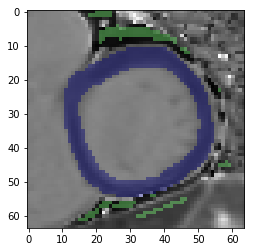

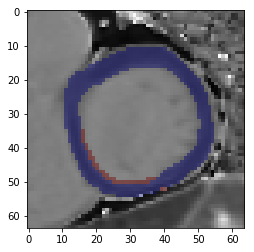

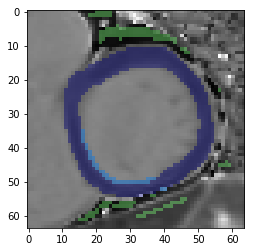

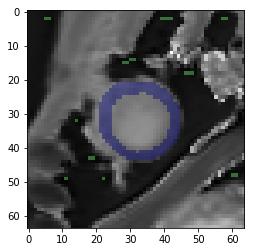

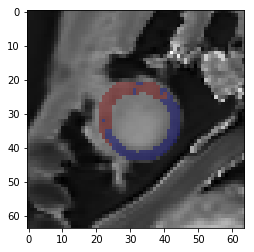

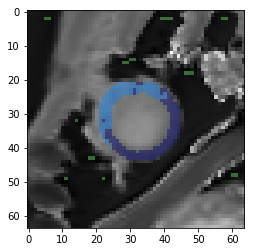

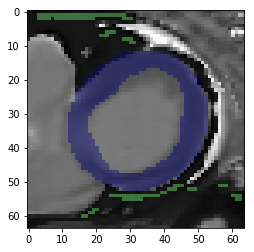

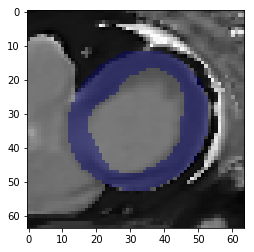

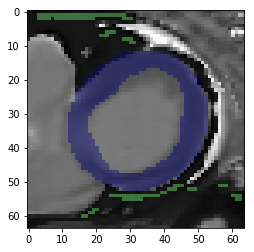

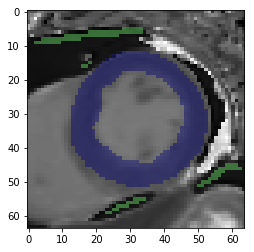

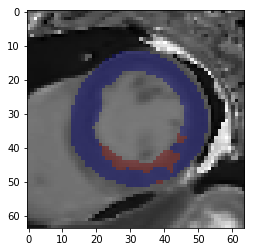

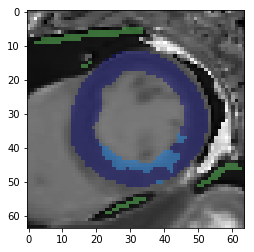

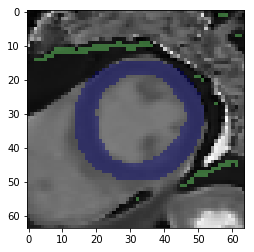

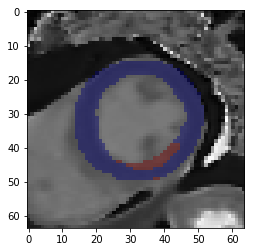

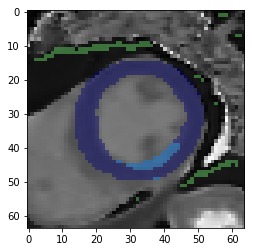

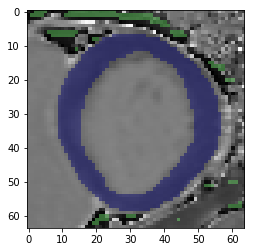

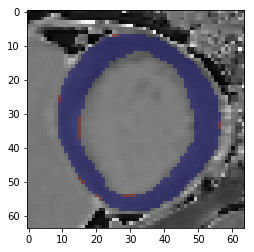

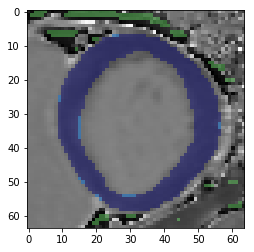

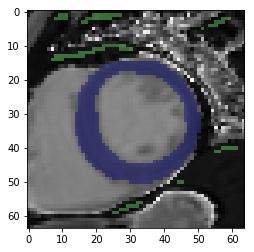

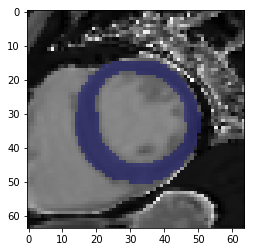

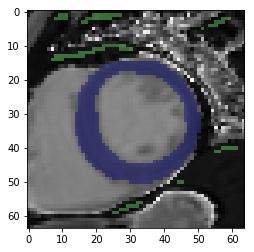

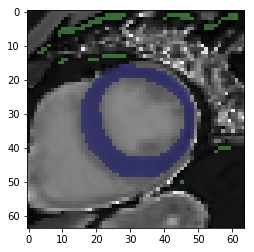

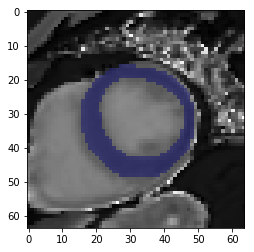

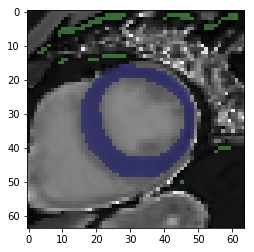

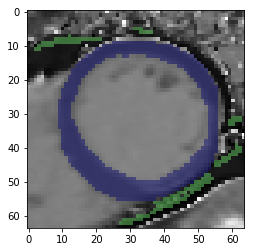

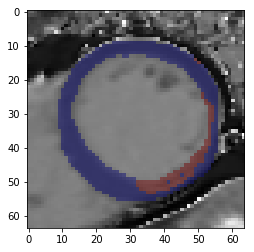

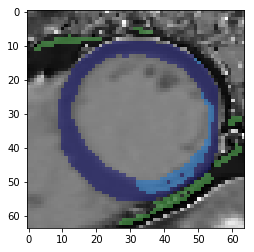

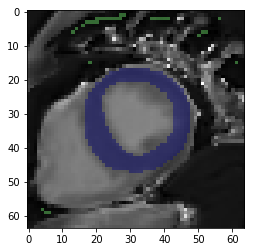

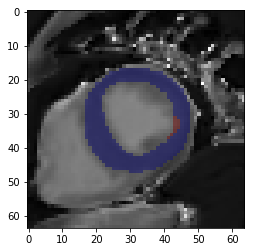

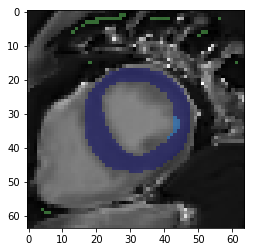

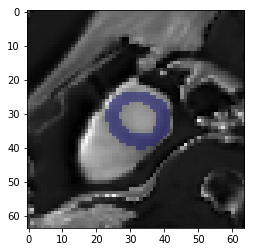

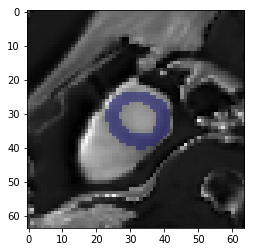

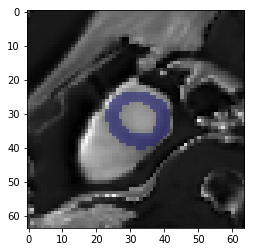

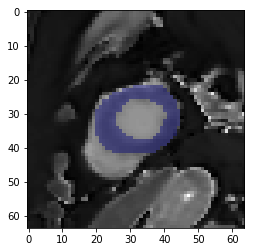

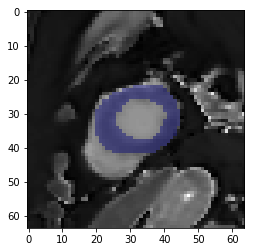

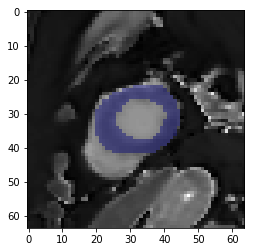

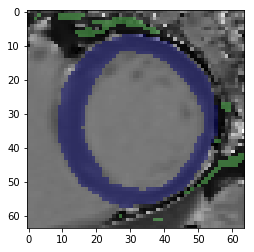

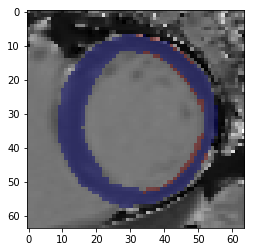

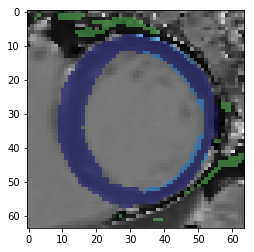

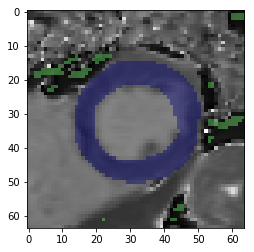

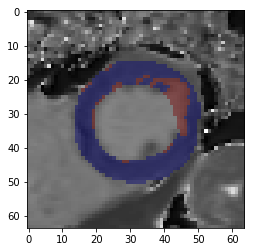

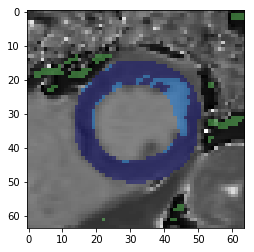

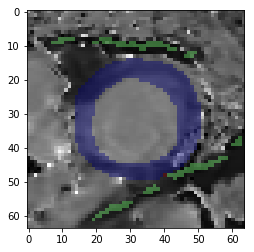

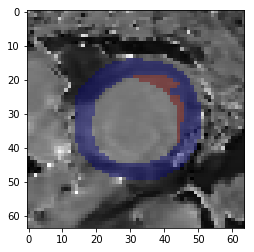

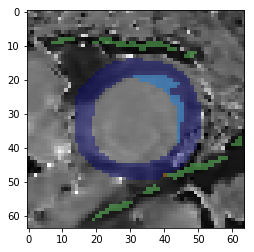

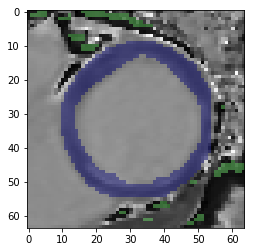

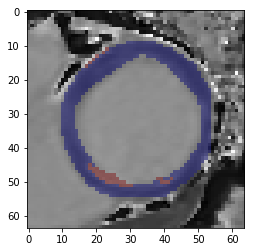

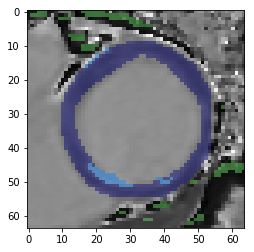

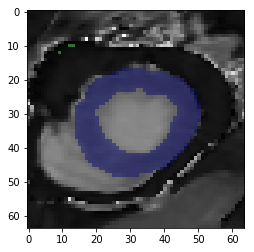

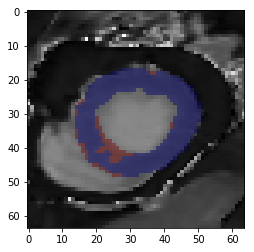

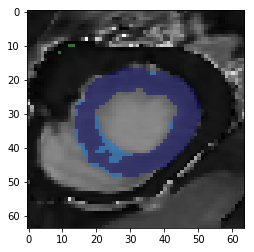

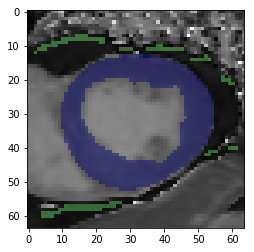

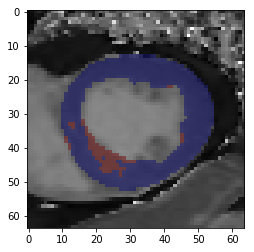

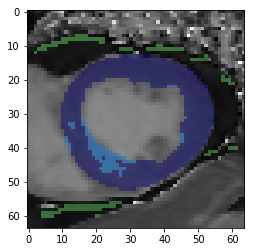

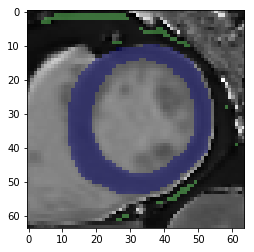

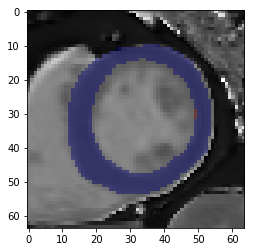

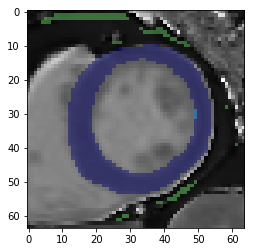

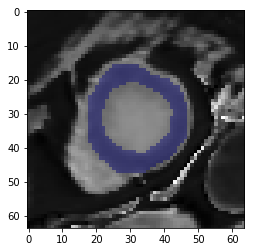

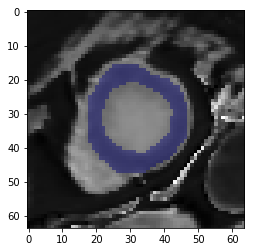

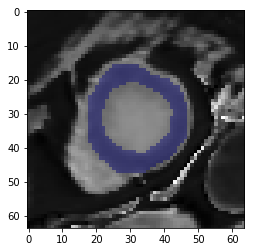

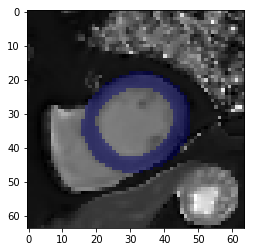

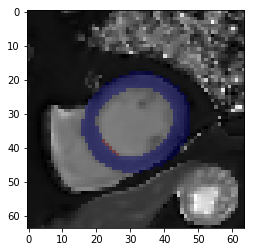

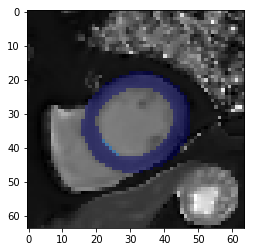

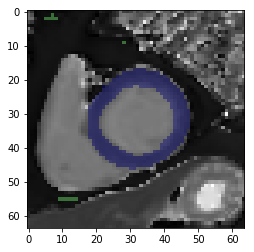

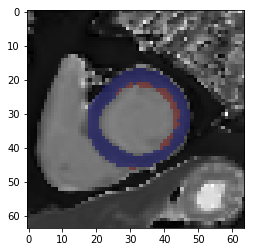

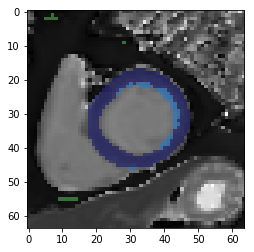

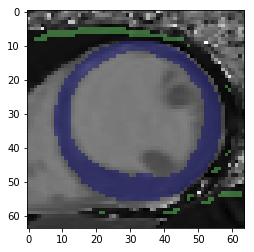

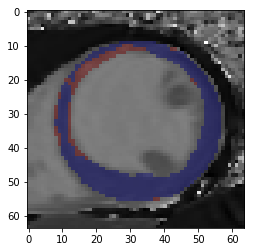

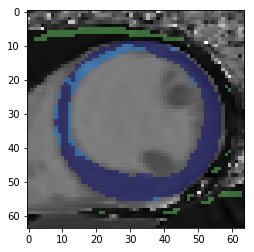

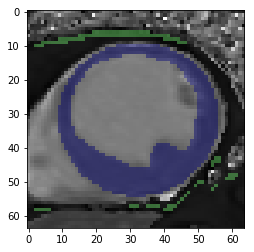

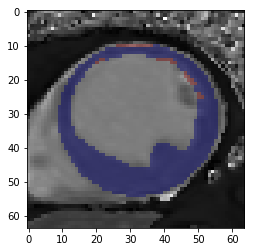

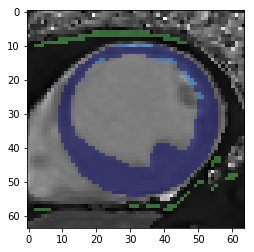

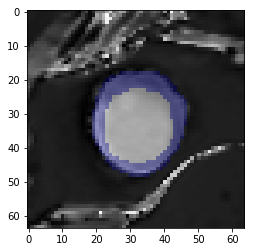

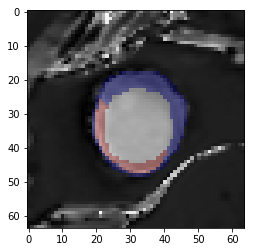

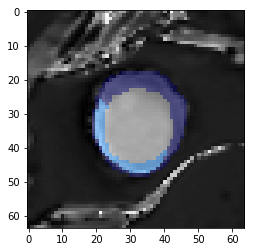

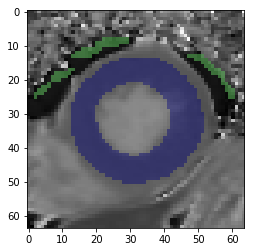

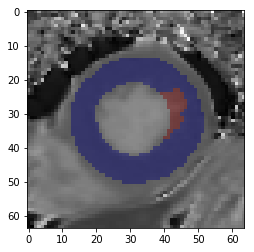

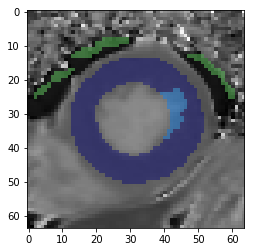

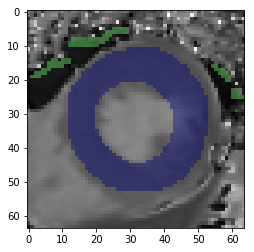

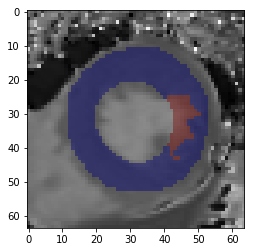

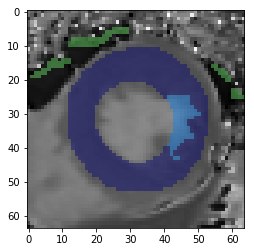

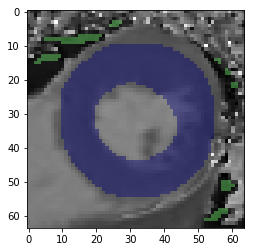

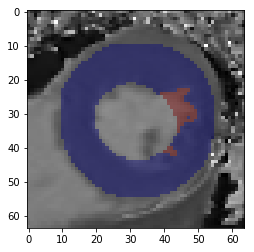

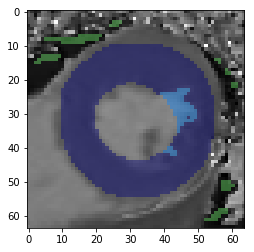

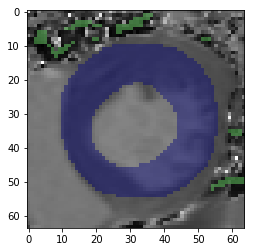

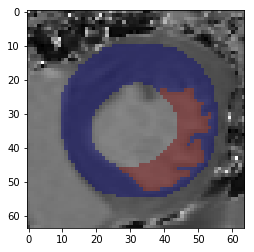

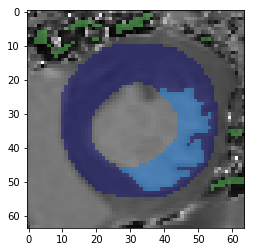

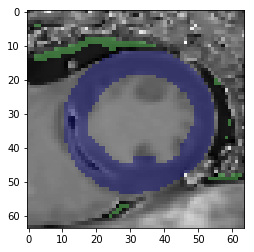

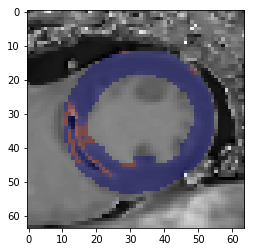

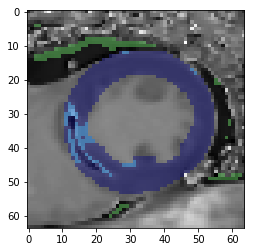

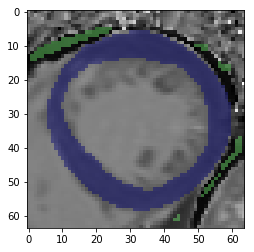

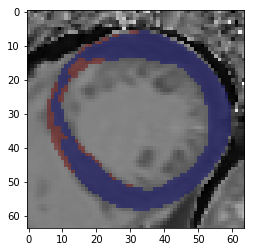

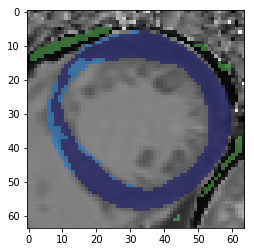

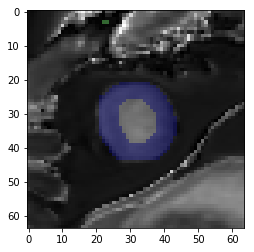

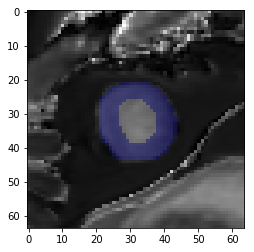

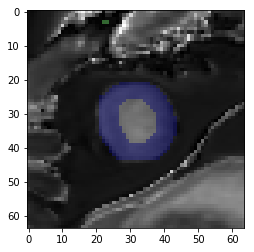

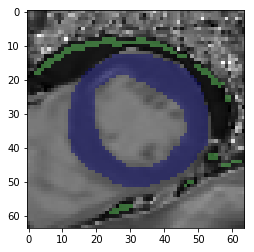

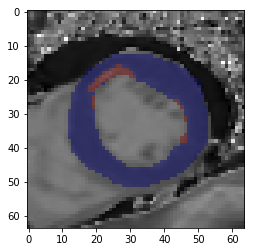

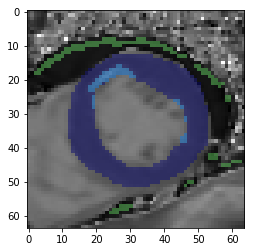

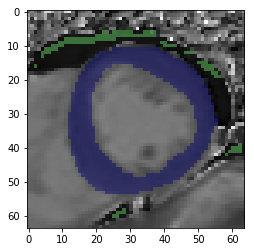

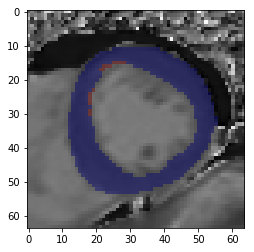

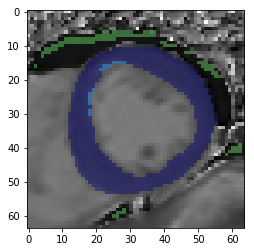

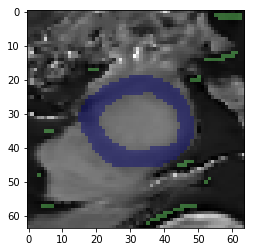

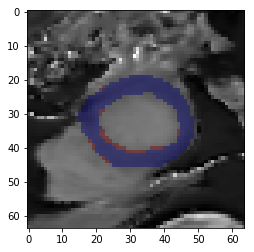

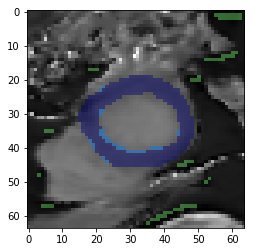

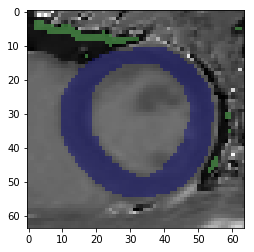

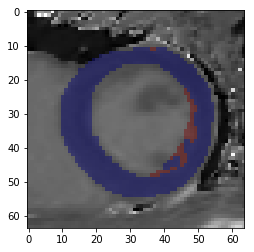

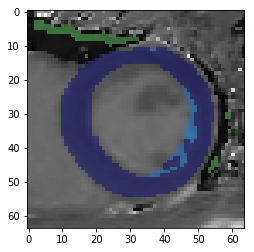

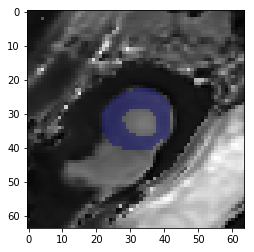

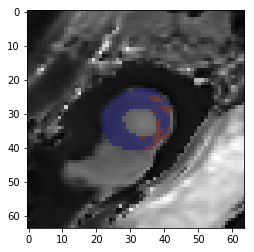

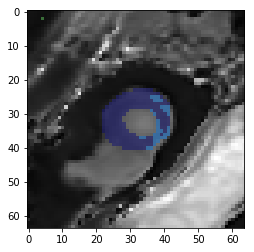

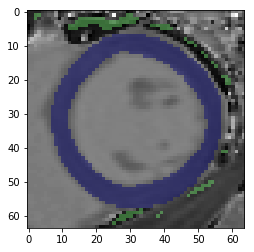

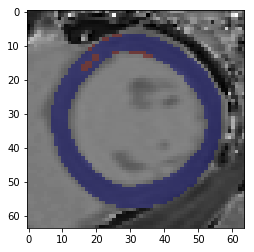

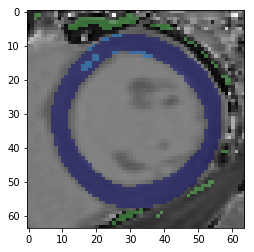

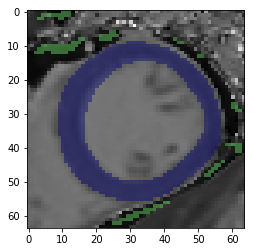

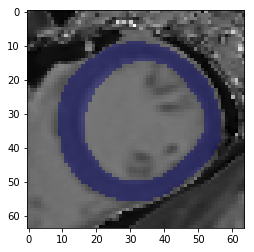

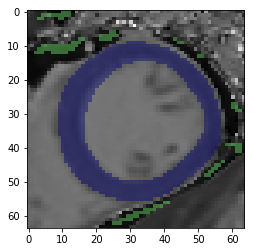

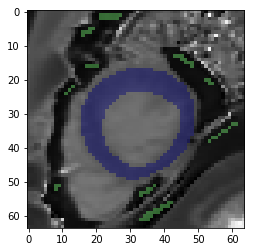

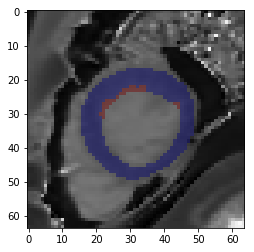

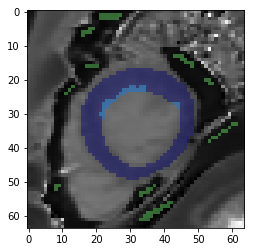

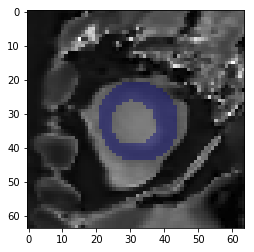

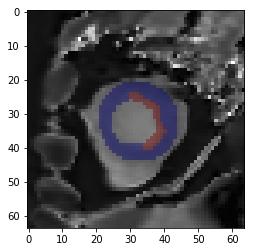

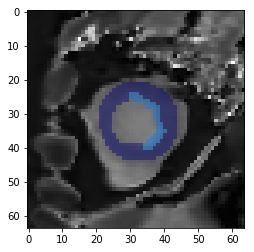

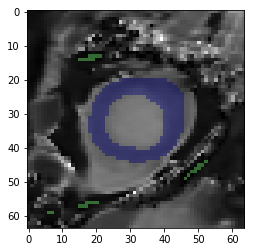

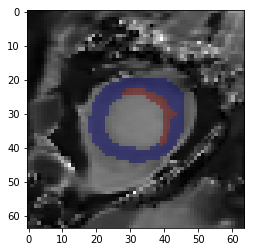

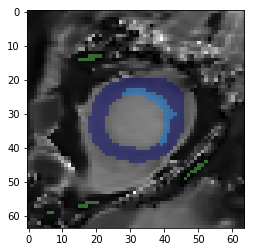

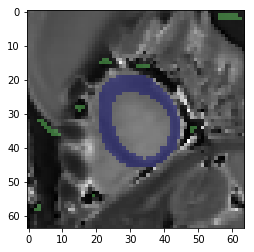

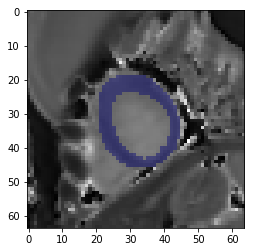

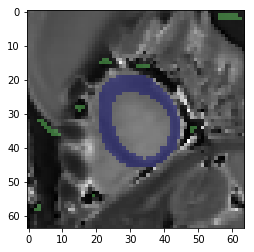

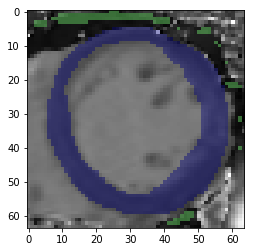

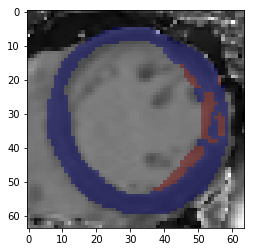

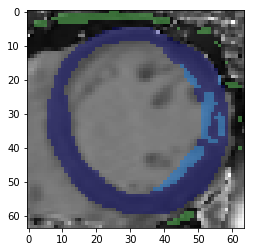

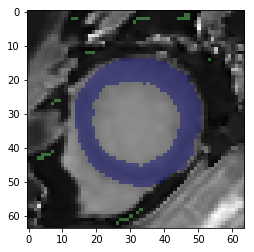

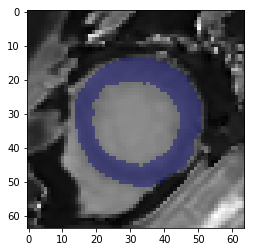

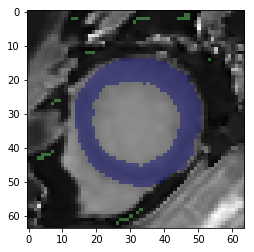

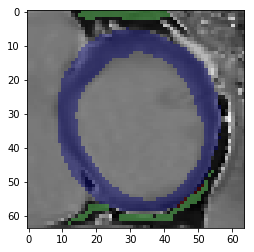

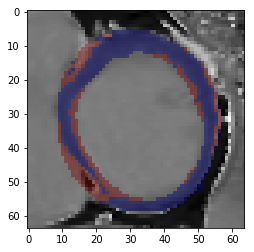

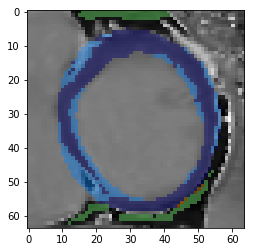

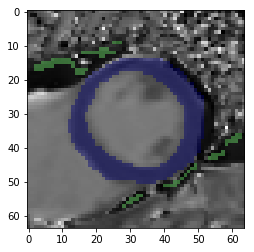

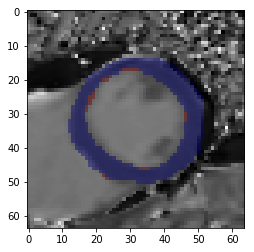

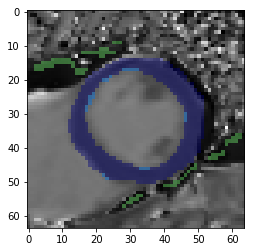

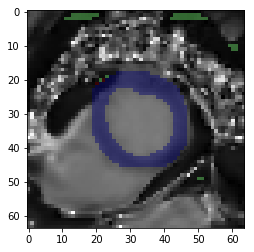

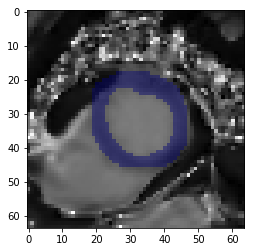

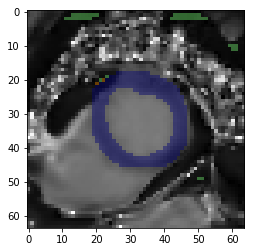

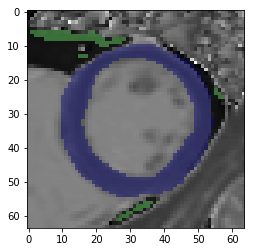

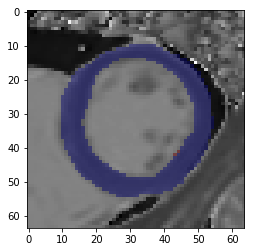

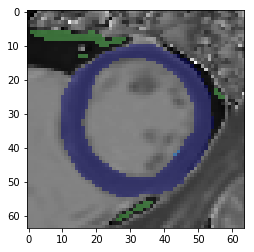

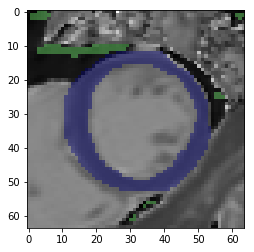

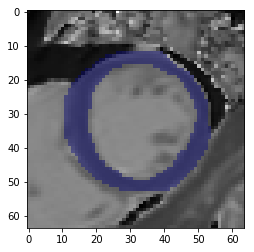

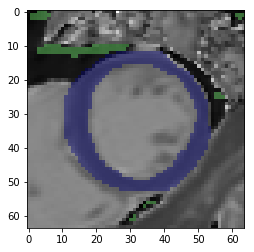

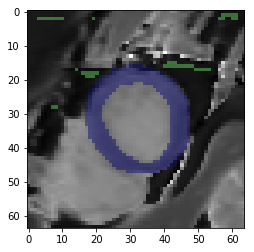

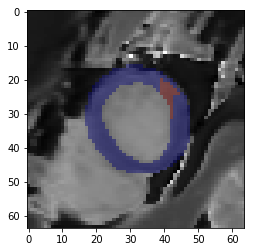

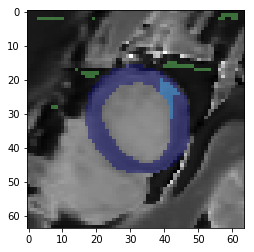

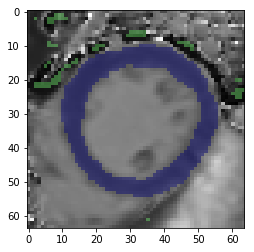

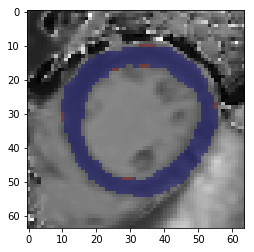

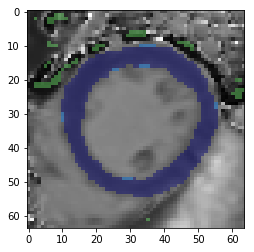

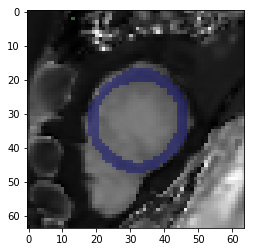

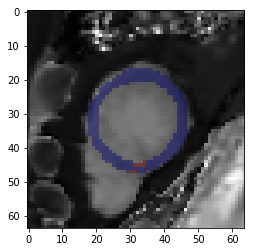

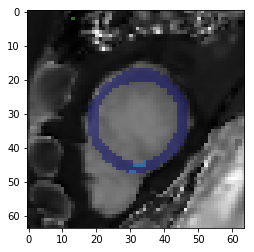

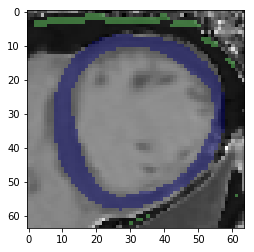

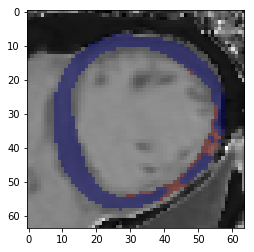

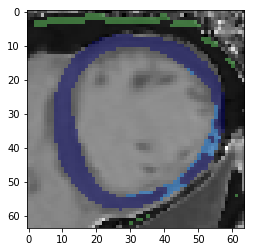

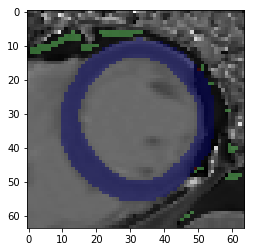

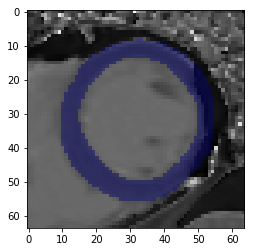

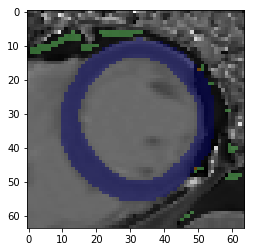

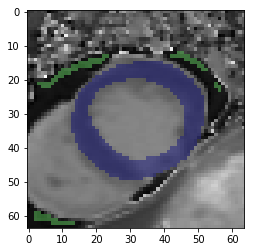

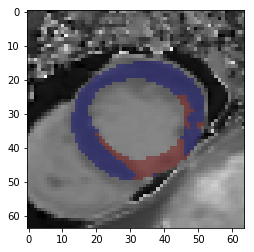

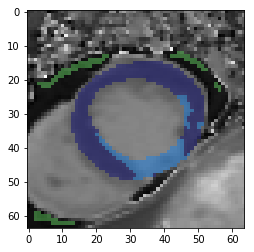

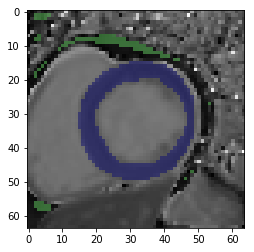

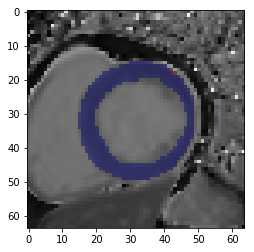

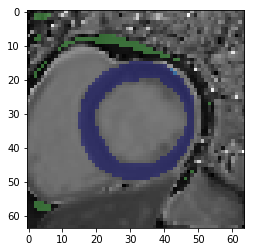

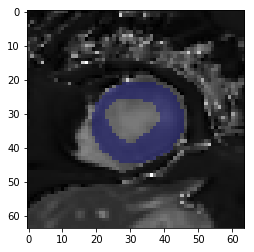

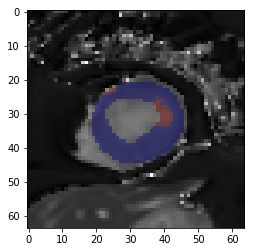

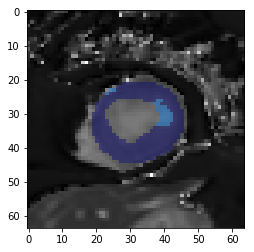

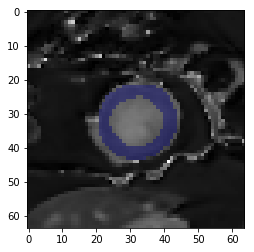

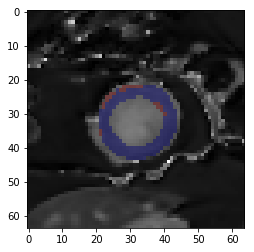

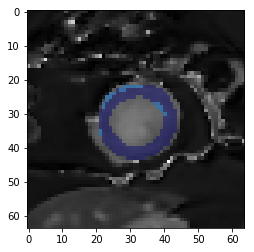

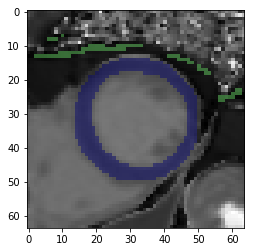

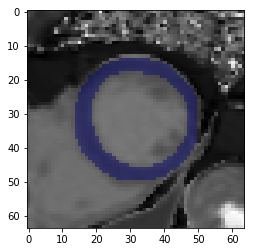

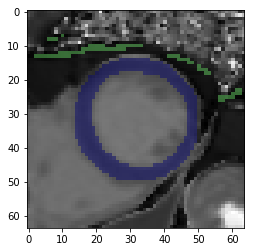

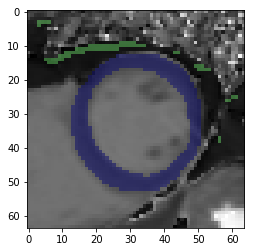

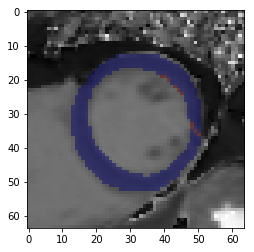

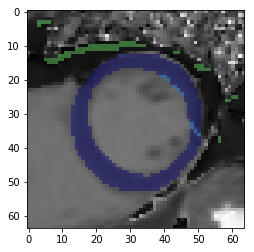

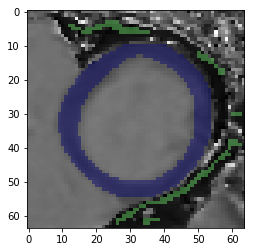

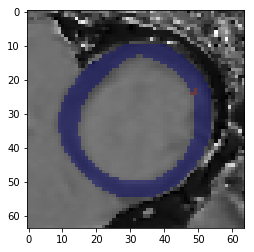

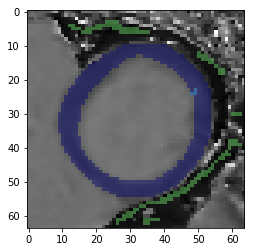

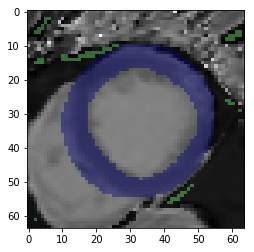

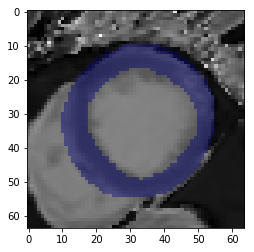

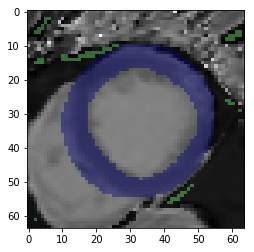

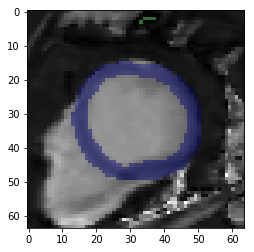

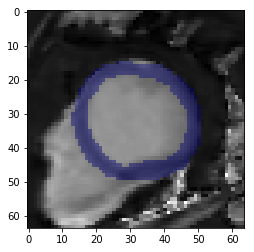

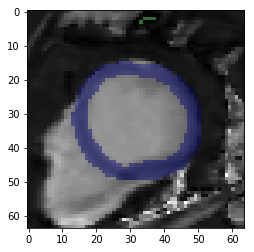

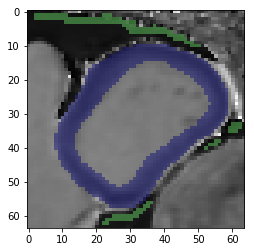

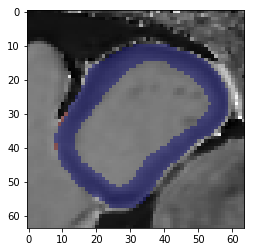

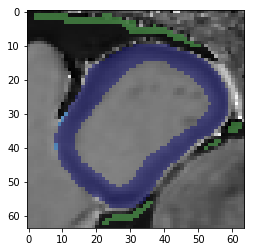

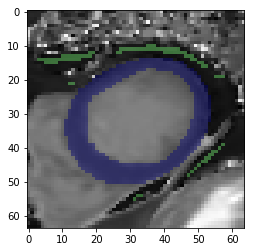

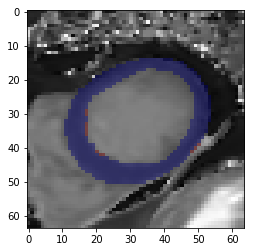

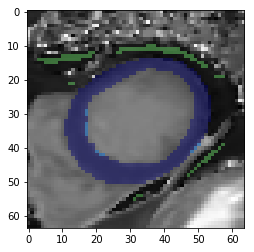

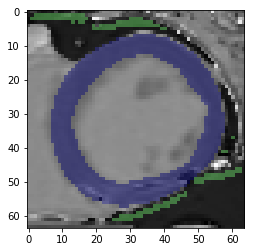

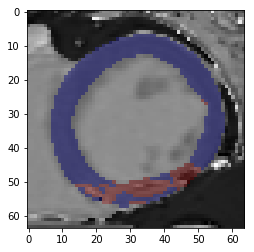

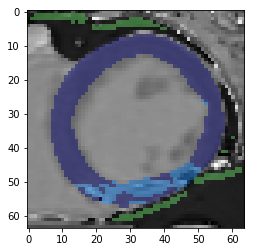

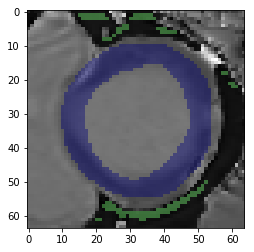

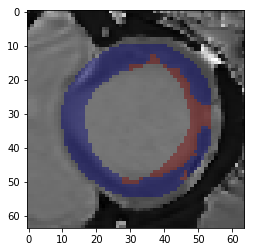

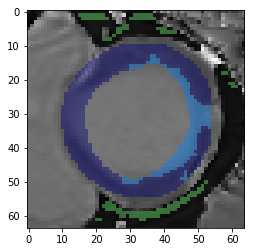

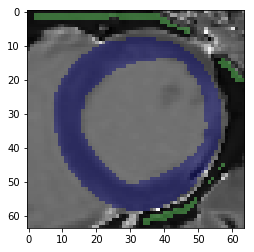

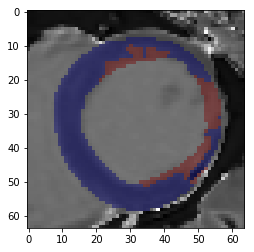

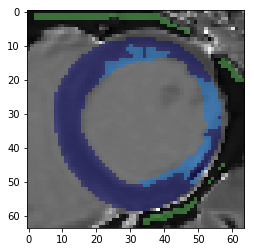

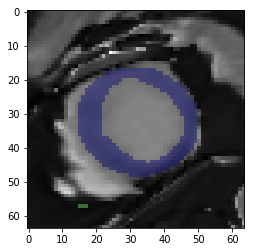

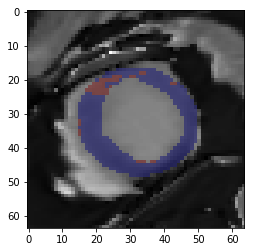

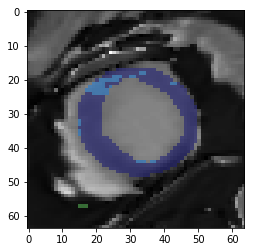

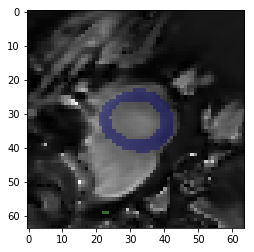

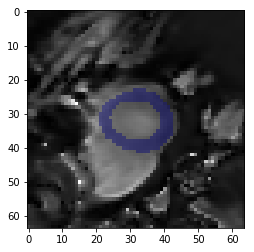

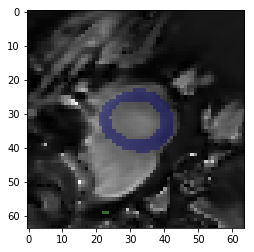

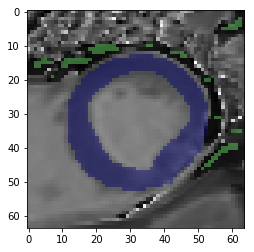

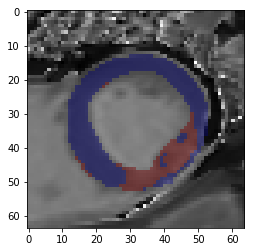

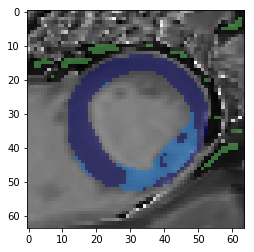

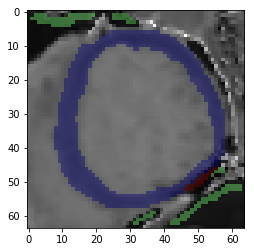

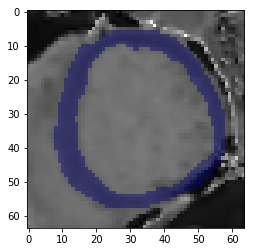

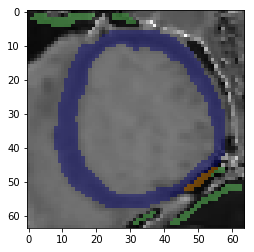

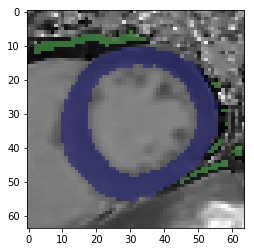

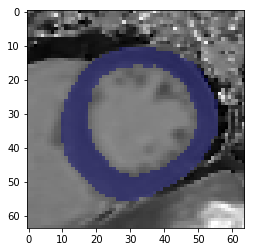

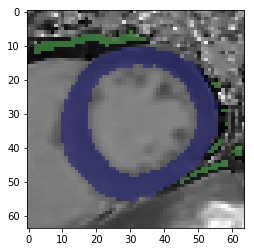

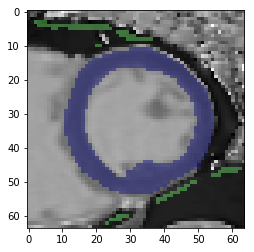

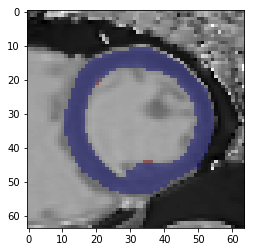

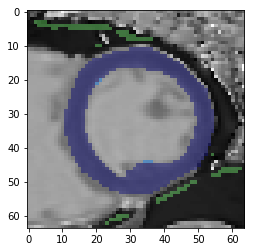

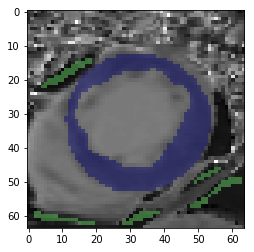

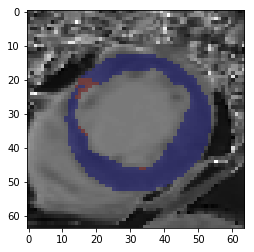

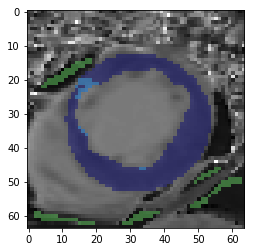

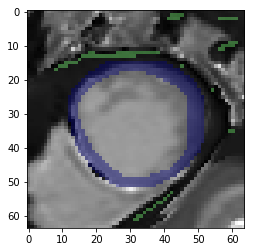

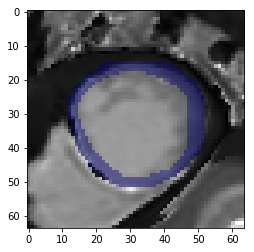

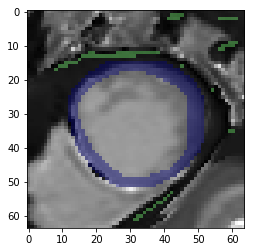

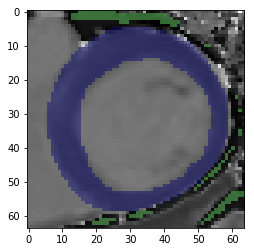

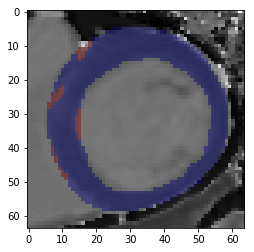

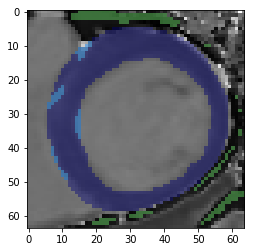

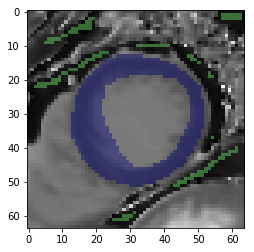

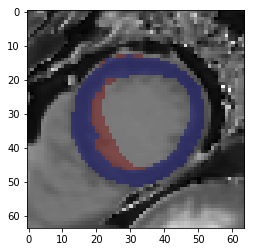

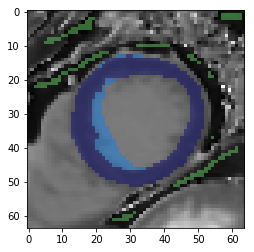

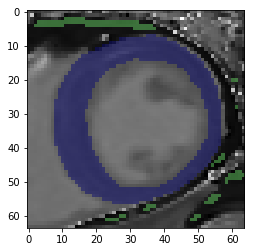

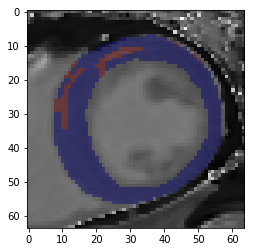

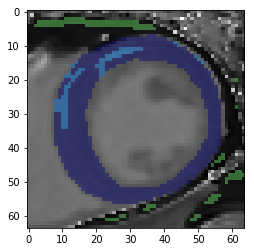

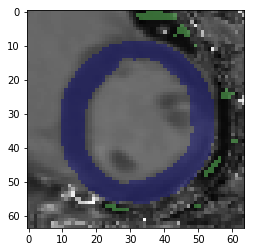

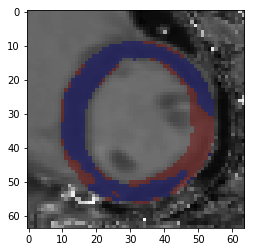

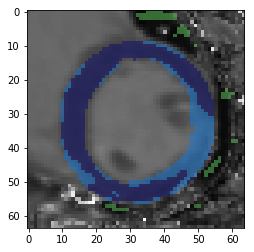

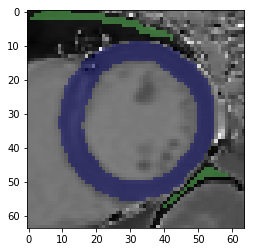

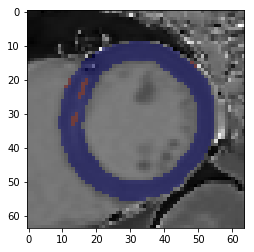

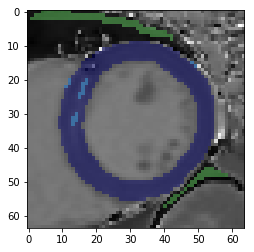

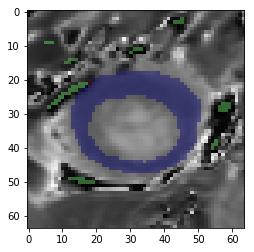

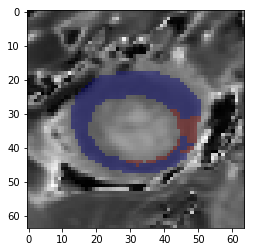

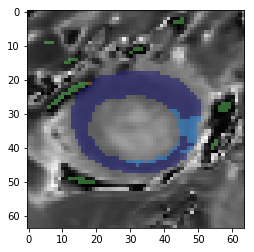

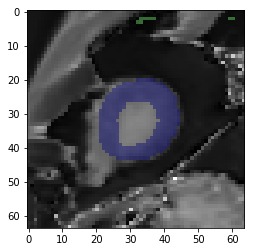

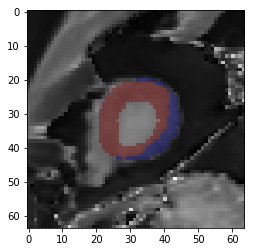

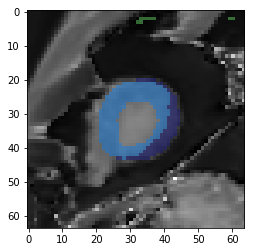

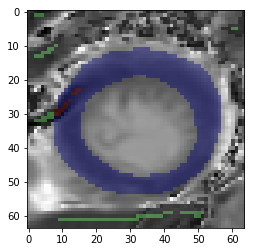

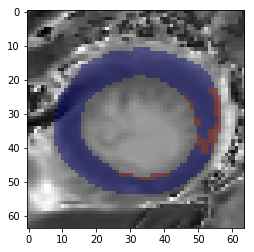

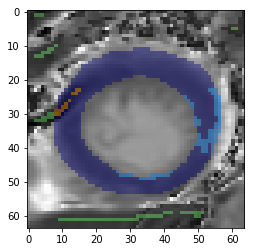

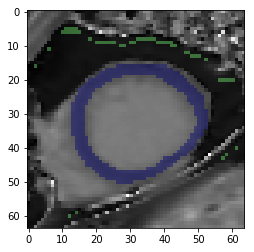

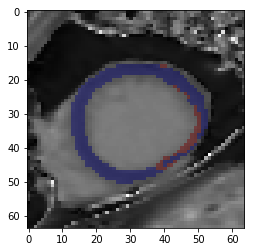

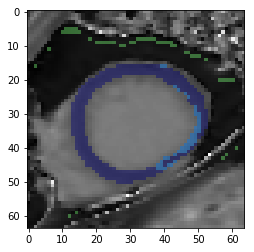

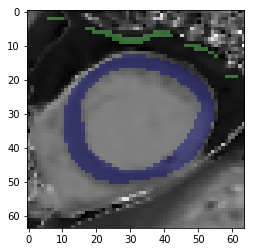

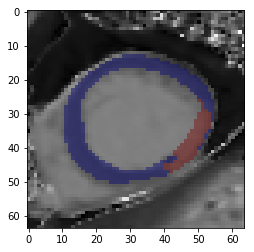

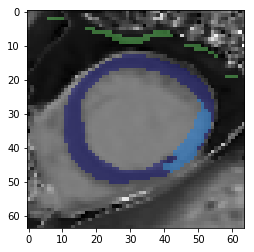

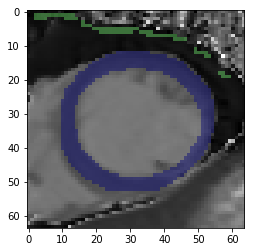

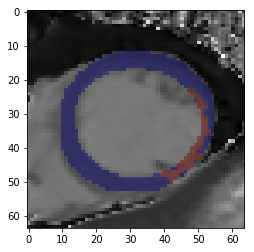

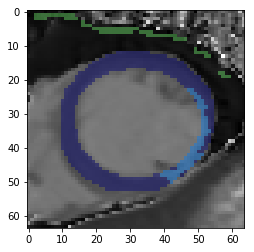

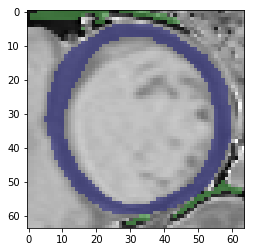

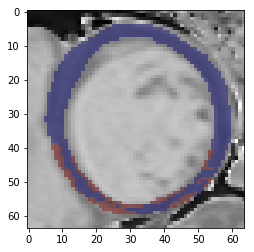

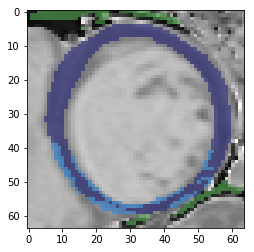

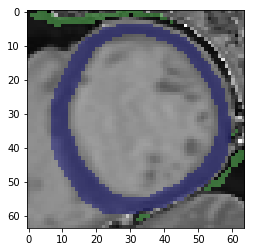

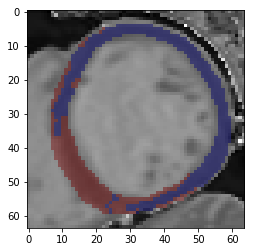

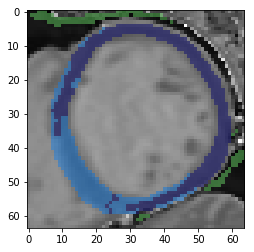

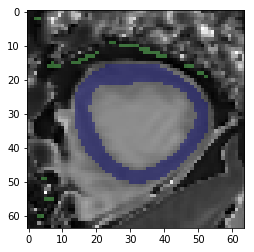

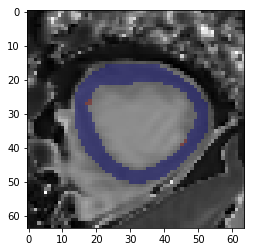

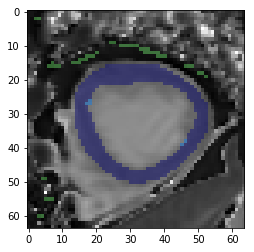

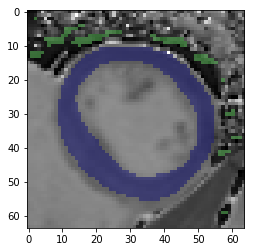

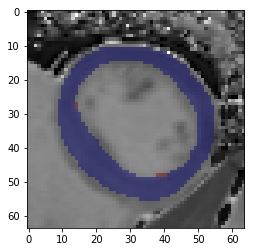

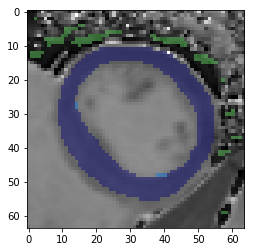

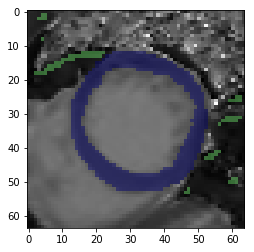

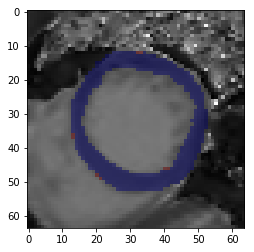

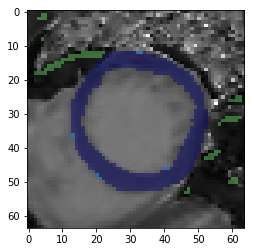

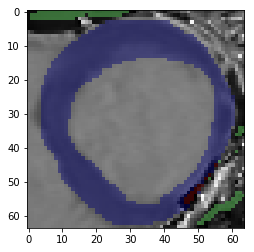

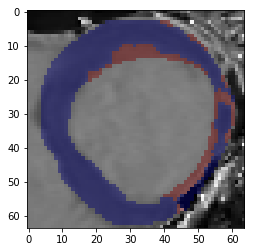

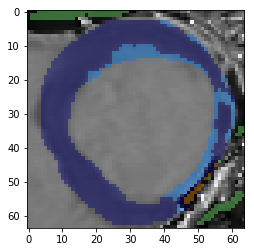

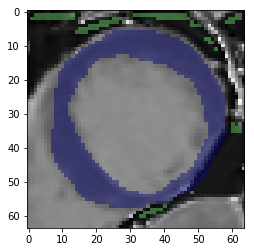

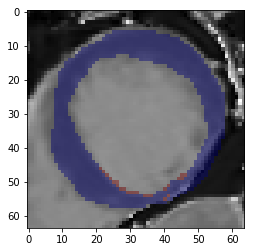

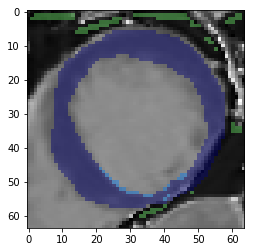

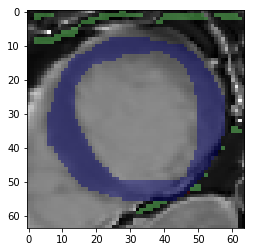

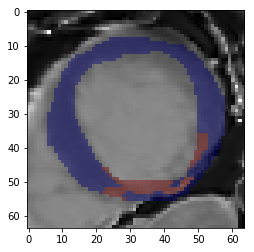

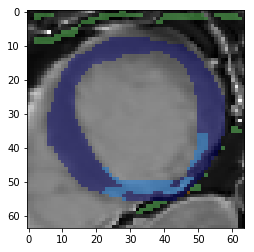

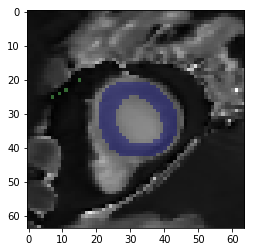

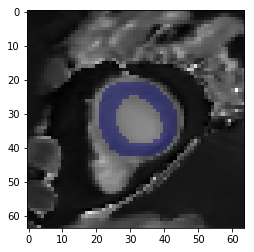

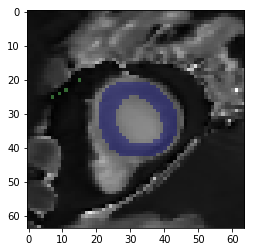

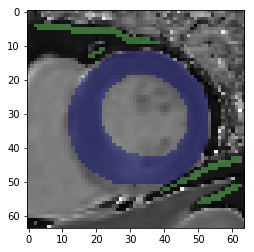

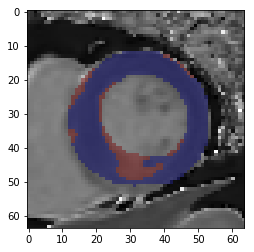

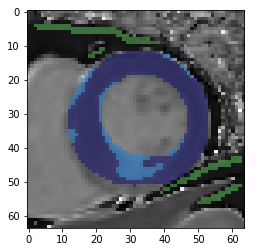

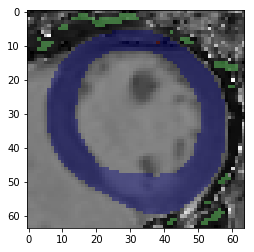

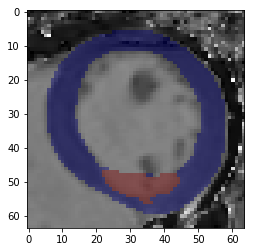

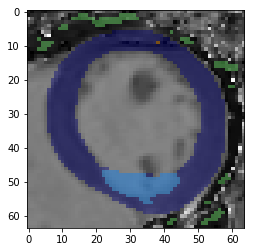

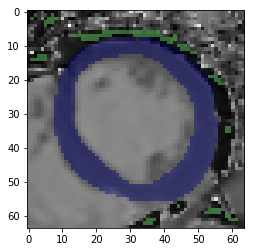

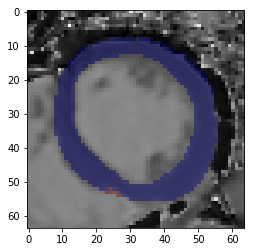

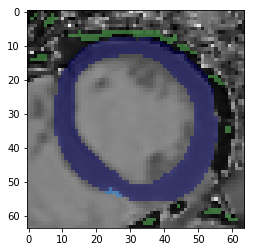

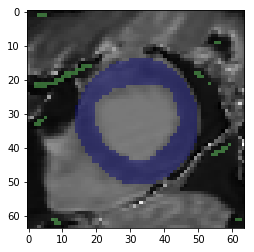

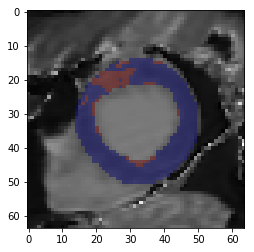

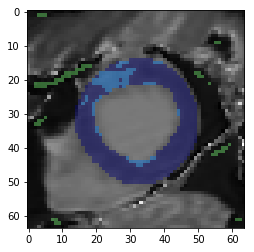

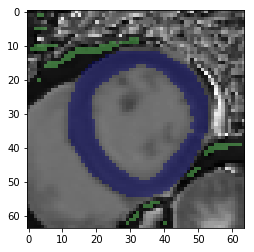

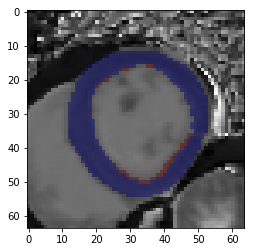

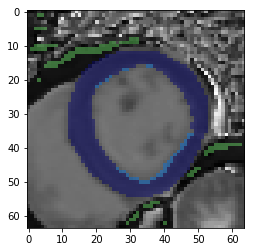

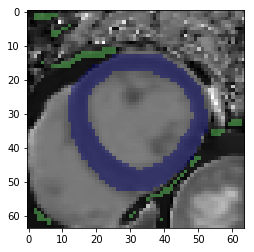

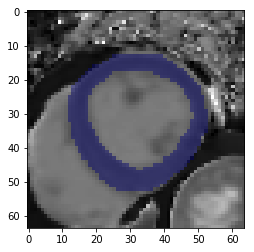

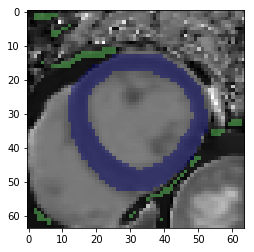

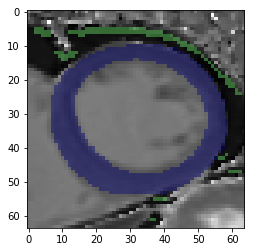

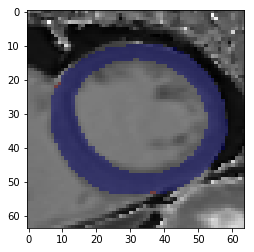

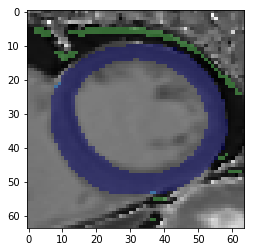

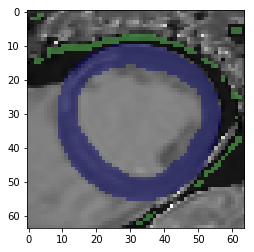

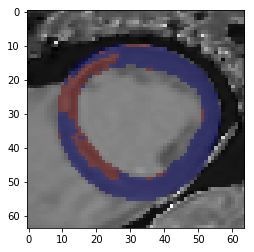

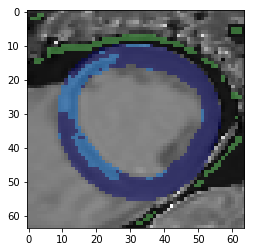

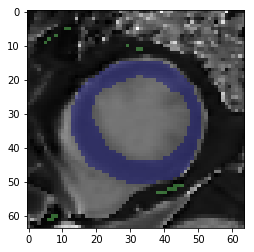

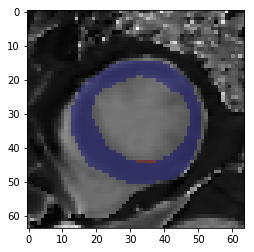

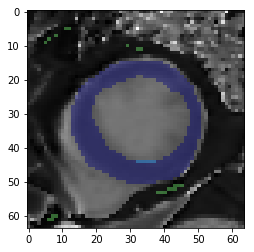

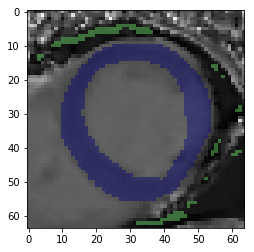

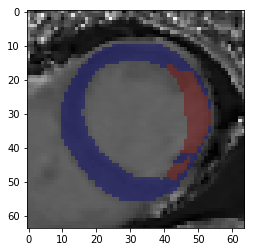

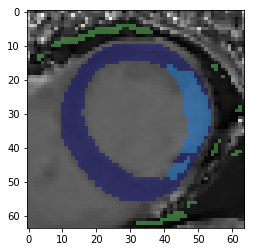

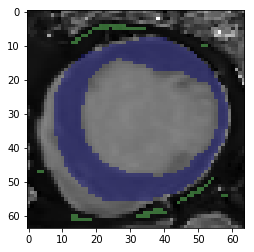

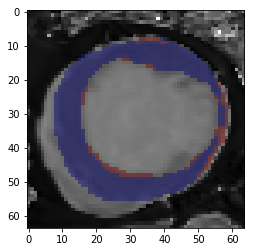

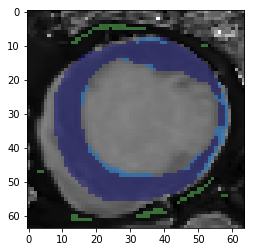

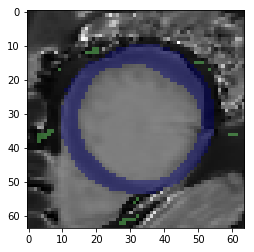

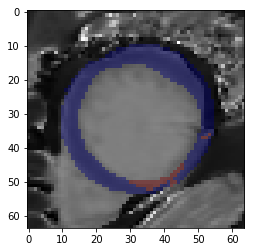

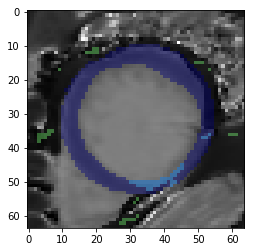

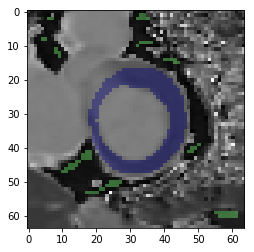

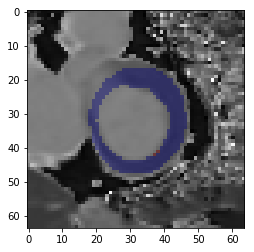

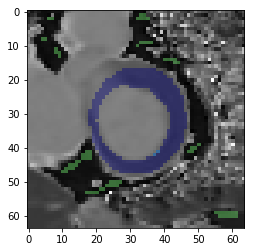

In [20]:
nums = len(features_train['img'])
out_dir = 'D:/DeepLearn/output/OutputImages_2019-02-12_03h43'
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)
    
for num in range(nums):
    fname = features_train['img'][num]
    #print(fname)
    
    test_myo = extract_myocardium(composite_path, fname, shape)
    overlay_infarct(test_myo, fname, shape, out_dir)

In [13]:
features_train['img']

0      108.tif
1      118.tif
2      138.tif
3      145.tif
4      153.tif
5       16.tif
6      162.tif
7      163.tif
8      166.tif
9      168.tif
10     171.tif
11     173.tif
12     175.tif
13     180.tif
14     181.tif
15     188.tif
16     194.tif
17     200.tif
18     204.tif
19     206.tif
20     209.tif
21      21.tif
22     210.tif
23     216.tif
24     220.tif
25     224.tif
26     228.tif
27     230.tif
28     234.tif
29     236.tif
        ...   
80     484.tif
81     497.tif
82     498.tif
83     504.tif
84     506.tif
85     507.tif
86     509.tif
87      52.tif
88     521.tif
89     522.tif
90     524.tif
91     525.tif
92     532.tif
93     538.tif
94      55.tif
95     552.tif
96      63.tif
97      67.tif
98       7.tif
99      71.tif
100     73.tif
101     77.tif
102     78.tif
103      8.tif
104     87.tif
105     88.tif
106      9.tif
107     91.tif
108     94.tif
109     97.tif
Name: img, Length: 110, dtype: object

## Load the model

In [10]:
import torch
from glob import glob
import os

base_dir = 'D:/DeepLearn/output/models'
file_path = glob(os.path.join(base_dir, '*'))
model_file = file_path[-1]

model = torch.load(model_file)


In [11]:
file_path

['D:/DeepLearn/output/models\\model_2019-01-15_12h47',
 'D:/DeepLearn/output/models\\model_2019-01-19_05h03',
 'D:/DeepLearn/output/models\\model_2019-01-20_02h32',
 'D:/DeepLearn/output/models\\model_2019-01-20_17h15',
 'D:/DeepLearn/output/models\\model_2019-01-20_17h43',
 'D:/DeepLearn/output/models\\model_2019-01-20_22h25',
 'D:/DeepLearn/output/models\\model_2019-01-21_19h22',
 'D:/DeepLearn/output/models\\model_2019-01-22_02h29',
 'D:/DeepLearn/output/models\\model_2019-01-22_17h01',
 'D:/DeepLearn/output/models\\model_2019-01-23_03h15',
 'D:/DeepLearn/output/models\\model_2019-01-25_03h08',
 'D:/DeepLearn/output/models\\model_2019-01-26_03h13',
 'D:/DeepLearn/output/models\\model_2019-01-27_03h30',
 'D:/DeepLearn/output/models\\model_2019-01-27_21h56',
 'D:/DeepLearn/output/models\\model_2019-01-28_13h24']

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

BN_EPS = 1e-4


class ConvBnRelu2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, dilation=1, stride=1, groups=1, is_bn=True,
                 is_relu=True):
        super(ConvBnRelu2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=padding, stride=stride,
                              dilation=dilation, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_channels, eps=BN_EPS)
        self.relu = nn.ReLU(inplace=True)
        if is_bn is False: self.bn = None
        if is_relu is False: self.relu = None

    def forward(self, x):
        x = self.conv(x)
        if self.bn is not None:
            x = self.bn(x)
        if self.relu is not None:
            x = self.relu(x)
        return x


## original 3x3 stack filters used in UNet
class StackEncoder(nn.Module):
    def __init__(self, x_channels, y_channels, kernel_size=3):
        super(StackEncoder, self).__init__()
        padding = (kernel_size - 1) // 2
        self.encode = nn.Sequential(
            ConvBnRelu2d(x_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
        )

    def forward(self, x):
        y = self.encode(x)
        y_small = F.max_pool2d(y, kernel_size=2, stride=2)
        return y, y_small


class StackDecoder(nn.Module):
    def __init__(self, x_big_channels, x_channels, y_channels, kernel_size=3):
        super(StackDecoder, self).__init__()
        padding = (kernel_size - 1) // 2

        self.decode = nn.Sequential(
            ConvBnRelu2d(x_big_channels + x_channels, y_channels, kernel_size=kernel_size, padding=padding,
                         dilation=1, stride=1, groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
        )

    def forward(self, x_big, x):
        N, C, H, W = x_big.size()
        # y = F.upsample(x, size=(H, W), mode='bilinear')
        y = F.interpolate(x, size=(H, W), mode='bilinear')
        y = torch.cat([y, x_big], 1)
        y = self.decode(y)
        return y


# 1024x1024
class UNet1024(nn.Module):
    def __init__(self, in_shape):
        super(UNet1024, self).__init__()
        C, H, W = in_shape
        # assert(C==1)

        # 1024
        self.down1 = StackEncoder(C, 24, kernel_size=3)  # 512
        self.down2 = StackEncoder(24, 64, kernel_size=3)  # 256
        self.down3 = StackEncoder(64, 128, kernel_size=3)  # 128
        self.down4 = StackEncoder(128, 256, kernel_size=3)  # 64
        self.down5 = StackEncoder(256, 512, kernel_size=3)  # 32
        self.down6 = StackEncoder(512, 768, kernel_size=3)  # 16

        self.center = nn.Sequential(
            ConvBnRelu2d(768, 768, kernel_size=3, padding=1, stride=1),
        )

        # 8
        # x_big_channels, x_channels, y_channels
        self.up6 = StackDecoder(768, 768, 512, kernel_size=3)  # 16
        self.up5 = StackDecoder(512, 512, 256, kernel_size=3)  # 32
        self.up4 = StackDecoder(256, 256, 128, kernel_size=3)  # 64
        self.up3 = StackDecoder(128, 128, 64, kernel_size=3)  # 128
        self.up2 = StackDecoder(64, 64, 24, kernel_size=3)  # 256
        self.up1 = StackDecoder(24, 24, 24, kernel_size=3)  # 512
        self.classify = nn.Conv2d(24, 1, kernel_size=1, padding=0, stride=1, bias=True)

    def _crop_concat(self, upsampled, bypass):
        """
         Crop y to the (h, w) of x and concat them.
         Used for the expansive path.
        Returns:
            The concatenated tensor
        """
        c = (bypass.size()[2] - upsampled.size()[2]) // 2
        bypass = F.pad(bypass, (-c, -c, -c, -c))

        return torch.cat((upsampled, bypass), 1)

    def forward(self, x):
        out = x  # ;print('x    ',x.size())
        #
        down1, out = self.down1(out)  ##;print('down1',down1.size())  #256
        down2, out = self.down2(out)  # ;print('down2',down2.size())  #128
        down3, out = self.down3(out)  # ;print('down3',down3.size())  #64
        down4, out = self.down4(out)  # ;print('down4',down4.size())  #32
        down5, out = self.down5(out)  # ;print('down5',down5.size())  #16
        down6, out = self.down6(out)  # ;print('down6',down6.size())  #8
        pass  # ;print('out  ',out.size())

        out = self.center(out)
        out = self.up6(down6, out)
        out = self.up5(down5, out)
        out = self.up4(down4, out)
        out = self.up3(down3, out)
        out = self.up2(down2, out)
        out = self.up1(down1, out)
        # 1024

        out = self.classify(out)
        out = torch.squeeze(out, dim=1)
        return out


# 128x128
class UNet128(nn.Module):
    def __init__(self, in_shape):
        super(UNet128, self).__init__()
        C, H, W = in_shape
        # assert(C==3)

        # 128
        self.down3 = StackEncoder(C, 128, kernel_size=3)  # 64
        self.down4 = StackEncoder(128, 256, kernel_size=3)  # 32
        self.down5 = StackEncoder(256, 512, kernel_size=3)  # 16
        self.down6 = StackEncoder(512, 1024, kernel_size=3)  # 8

        self.center = nn.Sequential(
            ConvBnRelu2d(1024, 1024, kernel_size=3, padding=1, stride=1),
        )

        # 8
        # x_big_channels, x_channels, y_channels
        self.up6 = StackDecoder(1024, 1024, 512, kernel_size=3)  # 16
        self.up5 = StackDecoder(512, 512, 256, kernel_size=3)  # 32
        self.up4 = StackDecoder(256, 256, 128, kernel_size=3)  # 64
        self.up3 = StackDecoder(128, 128, 64, kernel_size=3)  # 128
        self.classify = nn.Conv2d(64, 1, kernel_size=1, padding=0, stride=1, bias=True)

    def forward(self, x):
        out = x  # ;print('x    ',x.size())
        down3, out = self.down3(out)  # ;print('down3',down3.size())  #64
        down4, out = self.down4(out)  # ;print('down4',down4.size())  #32
        down5, out = self.down5(out)  # ;print('down5',down5.size())  #16
        down6, out = self.down6(out)  # ;print('down6',down6.size())  #8
        pass  # ;print('out  ',out.size())

        out = self.center(out)
        out = self.up6(down6, out)
        out = self.up5(down5, out)
        out = self.up4(down4, out)
        out = self.up3(down3, out)
        out = self.classify(out)
        out = torch.squeeze(out, dim=1)
        return out


In [4]:
import torch
from glob import glob
import os
import numpy as np
from PIL import Image

#base_dir = 'C:/Users/ZhangX1/Documents/Python_Scripts/DeepLearn/output'
base_dir = 'D:/DeepLearn/output'
file_path = glob(os.path.join(base_dir, 'models/*'))
model_file = file_path[-1]

model = UNet1024((1, 64, 64))
model_dict = torch.load(model_file)
model.load_state_dict(model_dict)
model.cuda() # Push to GPU
model.eval() # turning off BatchNorm

input_file ='D:/DeepLearn/input/TestingData/12.tif'
#input_file = 'C:/Users/ZhangX1/Documents/Python_Scripts/DeepLearn/input/LabelDataTotal/20.tif'
img = np.array(Image.open(input_file))
#example = np.unique(img)


# make example a torch tensor
value = torch.from_numpy(img)

# then put it on the GPU, make it float and insert a fake batch dimension
test_value = torch.autograd.Variable(value.cuda())
test_value = test_value.float()
test_value = test_value.unsqueeze(0).unsqueeze(0) # [1, 1, 64, 64]

# pass it through the model
prediction = model(test_value)

# get the result out and reshape it
cpu_pred = prediction.cpu()
result = cpu_pred.data.numpy()
array_res = np.reshape(result, (64,64))

C:\Users\ZhangX1\AppData\Local\Continuum\anaconda3\envs\JamesZhang\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [7]:
from PIL import Image

np.max(array_res)

7.371357

In [16]:
test_value.unsqueeze(0).shape

torch.Size([1, 1, 64, 64])

In [18]:
model.cuda()

UNet1024(
  (down1): StackEncoder(
    (encode): Sequential(
      (0): ConvBnRelu2d(
        (conv): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(24, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
      )
      (1): ConvBnRelu2d(
        (conv): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(24, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
      )
    )
  )
  (down2): StackEncoder(
    (encode): Sequential(
      (0): ConvBnRelu2d(
        (conv): Conv2d(24, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
      )
      (1): ConvBnRelu2d(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    